# Chapter 9: Unsupervised Learning Methods

When you don't have labeled data. What can you do? Clustering, mostly. This was called "Data Mining" back in the day before the AI/ML hype overtook the Data Mining hype.


In [193]:
# Common imports

from matplotlib.image import imread
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpl_toolkits.mplot3d.axes3d as p3

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import numpy as np


## K-means clustering

Let's use K-means and generate our own data since the book doesn't talk about creating any data for clustering.

In [26]:
# Generate the dataset
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=42)

# X are the features, y is the correct cluster ids

In [24]:
X[:,0].shape

(500,)

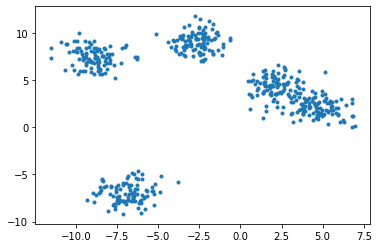

In [40]:
# And plot it
# scaled_color = y.astype(np.float32) / 10.0
plt.scatter(X[:,0], X[:, 1], marker='.')
plt.axis("on")
plt.show()

In [31]:
k=5
kmeans = KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)
accuracy_score(y_pred, y)

0.588

In [38]:
plt.scatter?

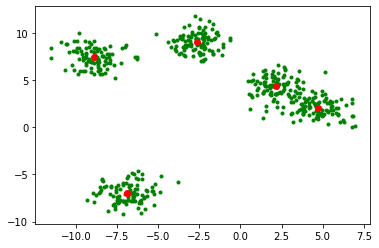

In [39]:
# And plot it
# scaled_color = y.astype(np.float32) / 10.0
plt.scatter(X[:,0], X[:, 1], color='green', marker='.')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')
plt.axis("on")
plt.show()

That was pretty close. I suspect the accuracy is low because the IDs of the clusters don't match up, but the clusters are great. Let's find other measures to see how good this clustering is, since accuracy is not something we would have in real-world data.

SK-Learn has a great page about making [Silhouette diagrams](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5935906353233216
For n_clusters = 3 The average silhouette_score is : 0.7083526015838516
For n_clusters = 4 The average silhouette_score is : 0.7328381899726921
For n_clusters = 5 The average silhouette_score is : 0.6786441315351273
For n_clusters = 6 The average silhouette_score is : 0.6206122073381205


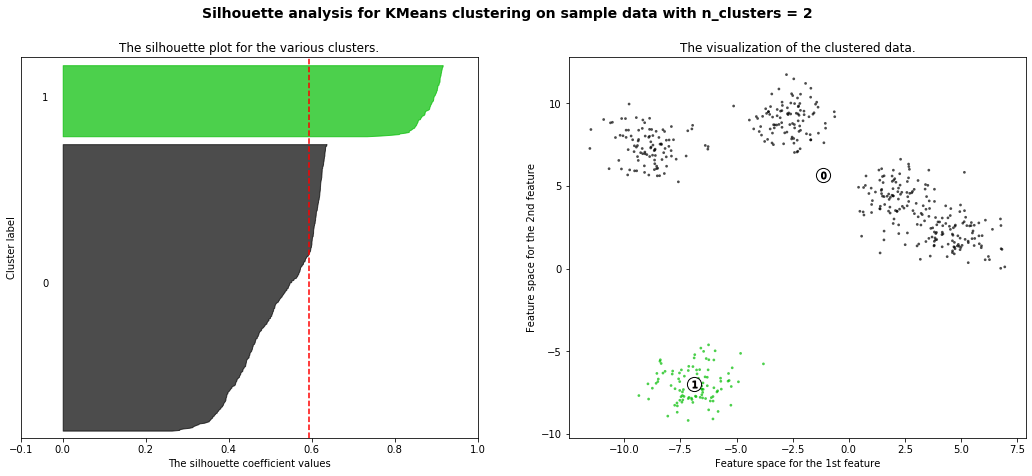

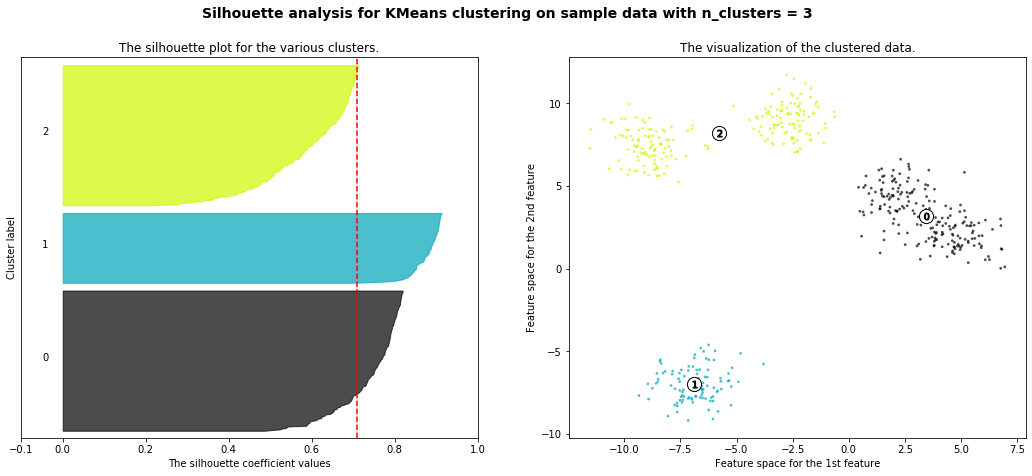

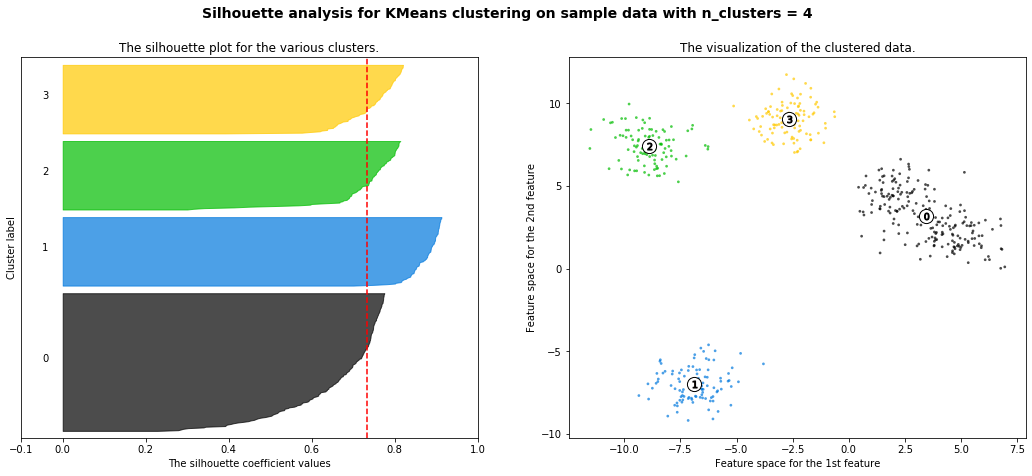

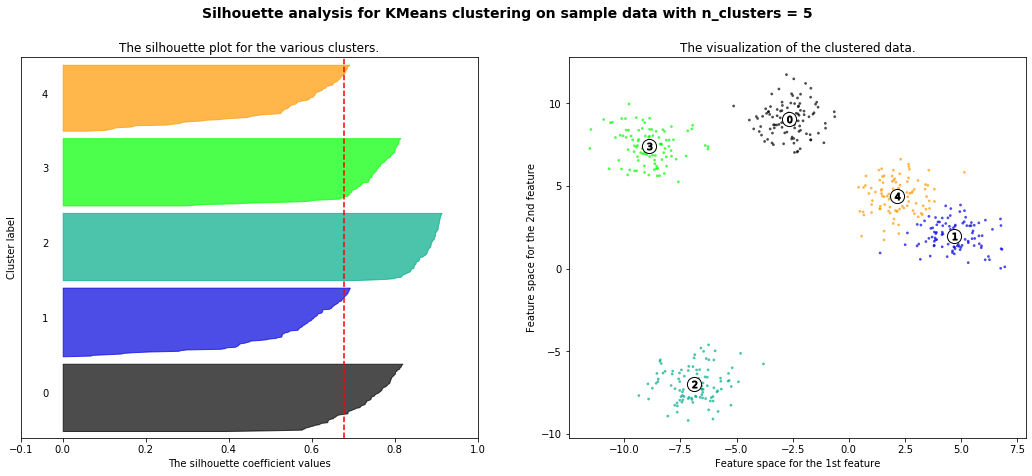

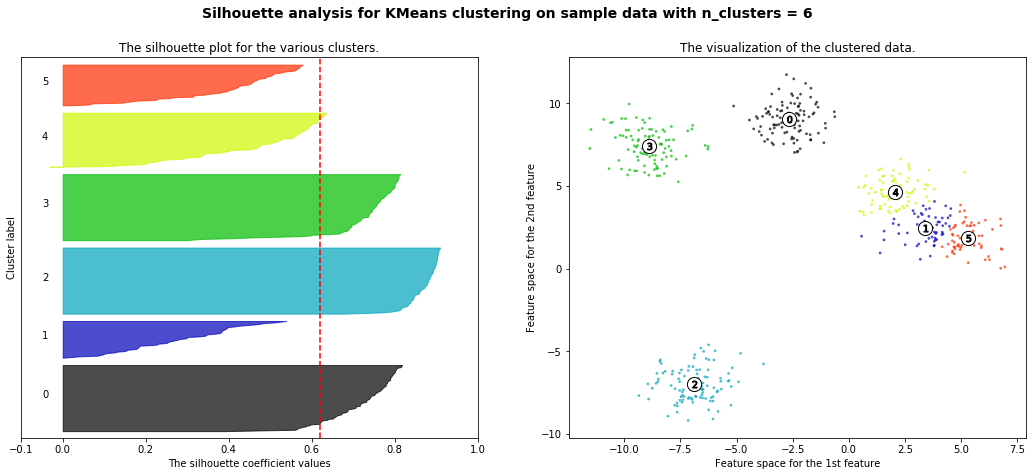

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

If we didn't know how the data was produced, I would be inclined to select four clusters rather than 5.

# Image segmentation

One use of clustering is image segmentation. You assign segments based on color values, and that identifies objects in the scene.

I didn't find the image used in the book. Let's pick something difficult, like [this image](https://www.nps.gov/pinn/learn/nature/ladybugs.htm) which as lots of ladybugs. Could be used to calculate how many ladybugs there are.

In [44]:
# Common imports

from matplotlib.image import imread
from sklearn.cluster import KMeans

import os
# Picking a somewhat difficult ladybugs file
ladies = imread(os.path.join("images", "ladybugs.jpg"))


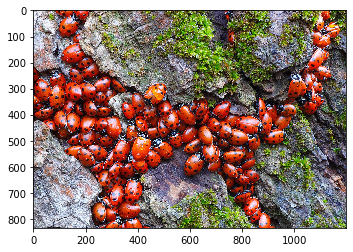

In [99]:
plt.imshow(ladies)
plt.show()

In [103]:
# -1 signifies flatten it, but along what axis (row-major or column-major)?
X_ladies = ladies.reshape(-1, 3)
kmeans = KMeans(n_clusters=5)


In [104]:
kmeans.fit(X_ladies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(ladies.shape)

In [105]:
def showClusterColors(kmeans, original_shape):
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(original_shape)
    plt.imshow(segmented_image.astype(np.int32))
    plt.show()

In [106]:
kmeans.cluster_centers_.shape

(5, 3)

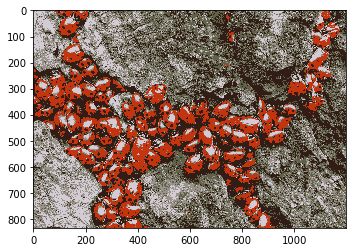

In [108]:
showClusterColors(kmeans, ladies.shape)

How big are the clusters, and how does the magic indexing operator cluster_centers_\[labels_\] work?

Let's try to find out but not spend too much time because this requires a good handle on numpy foundations that I need to get at some point.

Let's print each cluster center. There's only five of them.

In [67]:
kmeans.cluster_centers_[[0, 1, 0, 1]]

array([[ 49.62757733,  30.18278619,  21.49274675],
       [154.52576245, 147.56491508, 141.70072975],
       [ 49.62757733,  30.18278619,  21.49274675],
       [154.52576245, 147.56491508, 141.70072975]])

So this is how the indexing works. labels_ has the entire image flattened out with a single index indicating the label: 0, 1, 2, 0, ..., and so on.

And cluster_centers_ can be indexed by the same label. And so when you index using labels, you get a matrix as long as labels is! And that's the same size as the original image, using the color of cluster_centers. Brilliant.


In [83]:
def show_cluster(original_image_shape, index=0, kmeans=kmeans):
    "Show the cluster with the specified index"
    selected_cluster = kmeans.cluster_centers_.copy()
    
    # For all the other values, set them to pink (doesn't exist in image)
    # Total number of clusters
    n = selected_cluster.shape[0]
    # Create an indexing array with False only at the position 'index', False otherwise
    unselected = [True,] * n
    unselected[index] = False
    
    # Now set the color of index to black. White elsewhere
    selected_cluster[unselected] = [0, 0, 0]
    selected_cluster[index] = [1, 0, 0]

    image = selected_cluster[kmeans.labels_]
    
    picture = image.reshape(original_image_shape)
    plt.imshow(picture)
    plt.show()
    

def show_all_clusters(image_shape, kmeans=kmeans):
    "Show all clusters for this segmentation"
    # Number of clusters
    n = kmeans.cluster_centers_.shape[0]
    # Show each cluster
    for i in range(n):
        show_cluster(image_shape, i, kmeans)
    

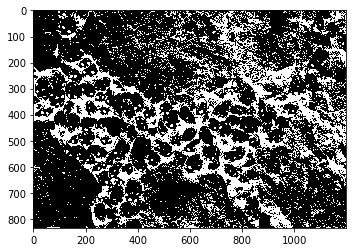

In [79]:
show_cluster(ladies.shape, 0, kmeans)

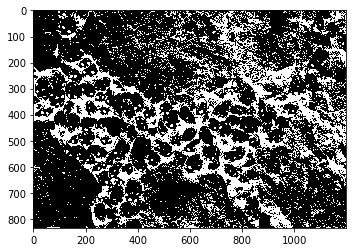

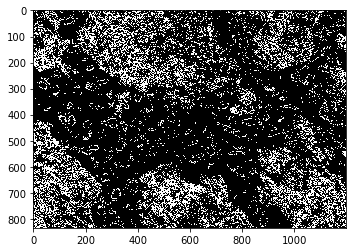

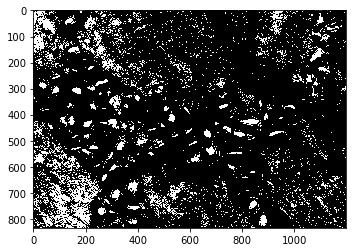

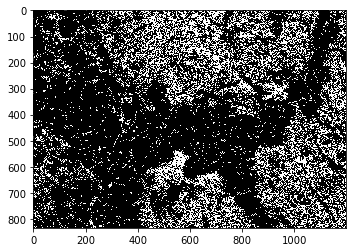

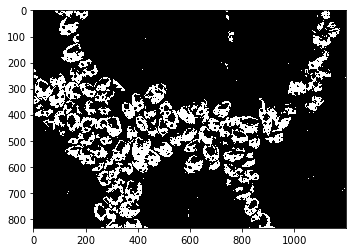

In [81]:
show_all_clusters(ladies.shape, kmeans)

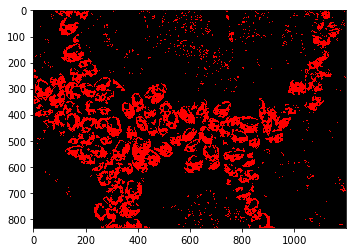

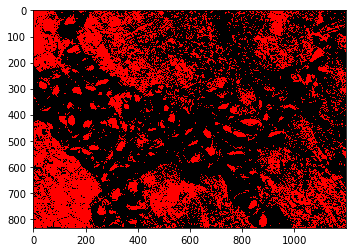

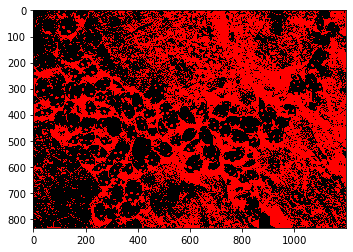

In [109]:
# Let's try fewer clusters, and see what they look like

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_ladies)
show_all_clusters(ladies.shape, kmeans)

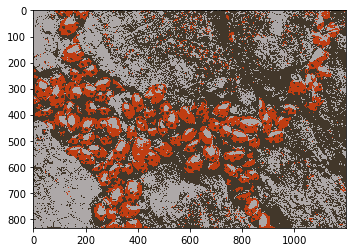

In [110]:
showClusterColors(kmeans, ladies.shape)

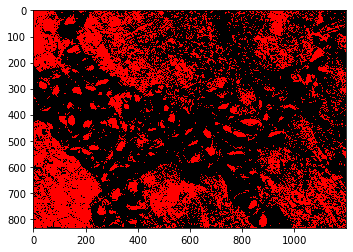

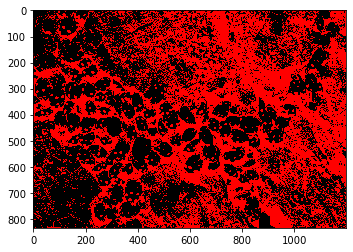

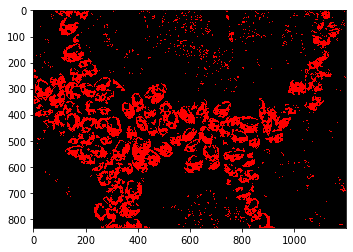

In [84]:
# Let's try fewer clusters, and see what they look like

show_all_clusters(ladies.shape, kmeans)

That might be decent.
* Cluster 0 is the rocks
* Cluster 0 is the rocks leaves
* Cluster 0 is the ladybugs.

Remember, this is what the image looks like

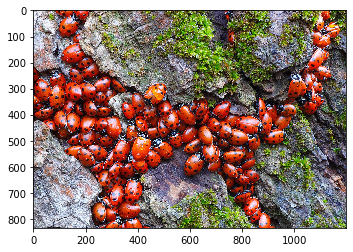

In [99]:
plt.imshow(ladies)
plt.show()

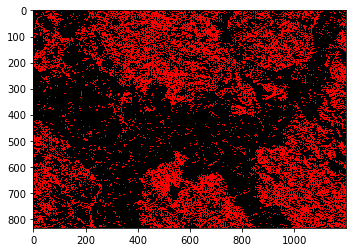

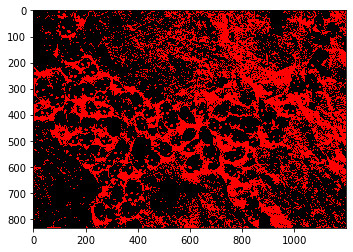

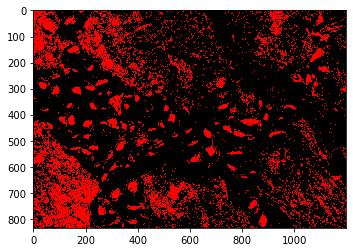

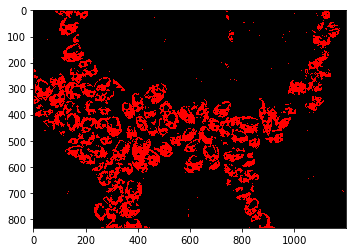

In [111]:
# Let's try 4 clusters, and see what they look like

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_ladies)
show_all_clusters(ladies.shape, kmeans)

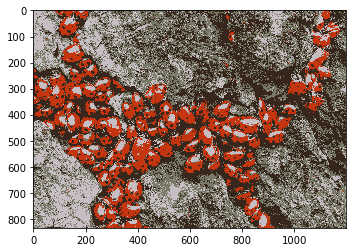

In [112]:
showClusterColors(kmeans, ladies.shape)

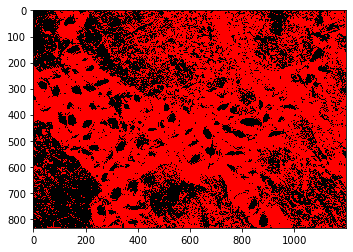

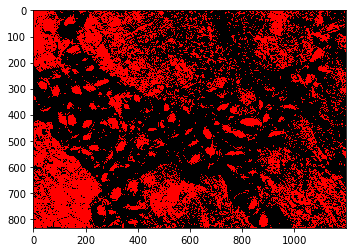

In [113]:
# How about just two clusters?
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_ladies)
show_all_clusters(ladies.shape, kmeans)

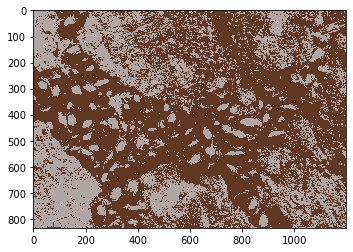

In [114]:
showClusterColors(kmeans, ladies.shape)

That was too few clusters. The rocks are now clustered along with the ladybugs, and the whole thing is a mess.

# Preprocessing

Clustering can be used to pre-process data to make it easier to see patterns and learn them using supervised learning. Let's use this idea on the mnist digits again.

In [115]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# This isn't MNIST, it is a different 8x8 database of numbers.
X_d, y_d = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d)
log_reg = LogisticRegression()

In [94]:
log_reg.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
log_reg.score(X_test, y_test)

0.9688888888888889

That was without any training, 96.8% accuracy. Also recognize that a trivial classifier
that answers '5' for every case would get 90% accuracy because there are roughly 1/10th
for each number, so 96.8% is good, but not great.

So let's do k-means clustering, this time calling .fit_transform(X_train) which replaces attributes (bit pixel values) by cluster ID's + distance, which transforms
the space, but logistic regression should work better if the clusters are meaningful.


In [97]:
from sklearn.pipeline import Pipeline

clustering = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('logistic', LogisticRegression())
])

clustering.fit(X_train, y_train)
clustering.score(X_test, y_test)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

The other way to use clustering is to take an unlabeled dataset, cluster it into a large'ish number of clusters. So for the 10 digits dataset, cluster into 50 classes, and then ask humans to label the centroid of these classes. Then, you propagate the labels to the values that are "close" to the centroid using the same distance measure used while clustering. Now you separate this dataset, and train on this dataset. The quality of the labels should improve greatly as the human work has amplified considerably.

This is an incredible idea.

In [116]:
# What is the accuracy of using just 50 values?
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8466666666666667

Just 84.6%, not surprising. Let's find centroids and manually label them.

1
0
2


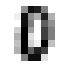

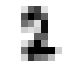

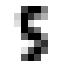

In [138]:
def showImage(indices, X=X_train):
    for i in indices:
        plt.figure(figsize=(1,1))
        print (i)
        # This isn't the MNIST data, instead it is a smaller, 64 pixels dataset.
        digit_image = X[i].reshape(8,8)
        plt.axis("off")
        plt.imshow(digit_image, cmap='binary')

showImage([1, 0, 2], X_train)


In [123]:
k=50
kmeans=KMeans(n_clusters=k)
X_digits_clusters = kmeans.fit_transform(X_train)

# X_digits_clusters is transformed, so it is in the space of cluster IDs, and distance
# from them. So now, we take the minimum distance, finding the digits that are closest
# to the center of the cluster.
center_digits_id = np.argmin(X_digits_clusters, axis=0)
X_representative_digits = X_train[center_digits_id]

In [154]:
# Labeling the data manually, I hope correctly.
y_representative = [4, 0, 1, 1, 5, 6, 7, 3, 2, 3,
                    0, 5, 8, 4, 8, 7, 1, 1, 3, 5,
                    9, 9, 4, 7, 4, 3, 6, 4, 8, 3,
                    2, 5, 6, 1, 2, 5, 8, 9, 6, 0,
                    9, 7, 3, 5, 7, 9, 9, 7, 8, 1,
                   ]

10
11
12
13
14
15
16
17
18
19


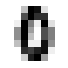

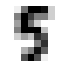

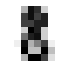

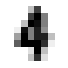

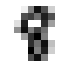

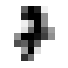

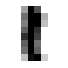

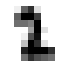

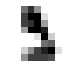

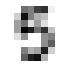

In [185]:
showImage(range(10, 20), X_representative_digits)

In [155]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative)
log_reg.score(X_test, y_test)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8844444444444445


I must have got the labeling wrong. Some of the digits were blurry. Stopping here.

16
18
186
231
303
382
393
397
409
430
433
437
455
478
530
580
581
660
752
914
920
936
996
1122


<ipython-input-138-6d2686d531a9>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(1,1))


1125
1213
1277


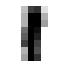

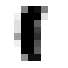

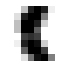

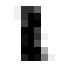

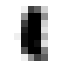

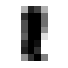

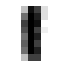

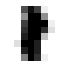

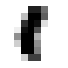

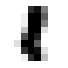

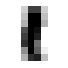

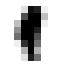

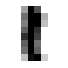

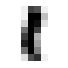

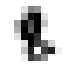

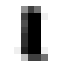

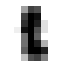

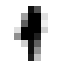

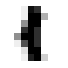

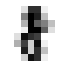

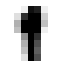

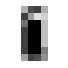

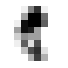

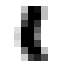

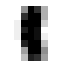

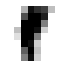

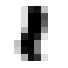

In [186]:
# This is the way to get the index for the cluster, and eyeball some of the elements.
clutser=16

p=np.array(range(1347))

idx = np.array((kmeans.labels_ == clutser))
p[idx]

showImage(p[idx], X_train)

We can use this strategy to cluster, then label, then find the values that are on the boundary of the cluster, and label those manually.

# DBSCAN

Finds contiguous regions of high density.


# Gaussian Mixture Model (GMM)

A mixture of Gaussians is used to predict points in a space. The goal is to predict
 * How many independent distributions (how many clusters)
 * For each cluster
     * Mean vector (for the Gaussian distribution)
     * Covariance matrix (for the Gaussian distribution)

That will allow us to use the Gaussian distribution to predict outliers (outside $3 \sigma$) and to cluster.

You can initialize Gaussian Mixture Models with how many Gaussians to use, but there is
no good number to set this to.

You can either use AIC and BIC as measures and try running GMM on different numbers of clusters.

You can also run Bayesian GMM, which also tells you how many clusters it expects. I don't fully understand Bayesian GMM, and the book doesn't explain it well. Need to either read the [Math](https://turing.ml/dev/tutorials/1-gaussianmixturemodel/) or [the algorithm](https://www.coursera.org/lecture/bayesian-methods-in-machine-learning/gaussian-mixture-model-LyAxY) to [learn how it works](https://www.coursera.org/lecture/bayesian-methods-in-machine-learning/gaussian-mixture-model-LyAxY).

# Exercises

Ex 1:
 Clustering is to put observations into groups, so some observations share some important attribute. Some clustering algorithms are:
* K-means clustering
* Agglomerative clustering
* Gaussing Mixture Models (when the data is composed of observations drawn from Gaussian aka Normal distributions)
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN): Find observations that are "connected" to other observations, thereby finding clusters.


Ex 2: Main applications of clustering: 
* To find "structure" in the observations.
* To help other methods like LogisticRegression, etc, to work better on labled instances.
* To reduce labeling work by finding "close" observations where the centroid can be labeled.
* To visualize an unknown database and see some structure in it.
* To find anomalies (observations that are outside $3\sigma$ of expectations)
* To find novelties (observations not expected by the current model)
* To do image segmentation
* To reduce information/dimensions when (centroid + distance) can be a more compact representation.
* To create generative models like GMM that can "produce" the observations.


Ex 3: When using K-means.
* You can use AIC() BIC() as measures, and run clustering on different cluster sizes, and choose one based on the measure.
* Creating the silhouette scores or diagrams (see above) and picking a cluster size using those measures.

Ex 4: Label propagation is when you have a few labeled instances. So you cluster the observations, and then apply the label (from the manually labeled instances) to the unlabeld observations that are close to the centroid of a cluster. Sometimes this can improve the accuracy of classification algorithms.

Ex 5: Clustering algorithms that work for large input datasets:
* K-means is fast, and usually works well
* Bayesian Guassian Mixture Model

High-density observations benefit from:
* Density-Based Splatial Clustering of Applications with Noise (DBSCAN)
* Agglomerative clustering.


Ex 6: Active learning would be useful when the algorithm works for most cases, but gets some observations horribly wrong. In these cases, you can cluster the new observations, and if they are too far from existing clusters then you manually label them. This focuses labeling effort on difficult cases where the algorithm would usually go wrong.

Ex 7: 
* To find anomalies (observations that are outside $3\sigma$ of expectations)
* To find novelties (observations not expected by the current model)

Ex 8:
 Gaussians are extensions of Normal distributions in $n$ dimensions. So instead of a mean, you have a vector $\mu$ of means of dimension $n \times 1$. And instead of a single $\sigma$ variance, you have a covariance matrix $\Sigma$ of dimensions $n \times n$.
 
 When you can model the input data as a collection of observations that are generated by drawing from a set of these Gaussians, you have a Gaussian Mixture Model.
 
 You use it to describe a dataset, to try to fit it, to try to estimate $\mu$ and $\Sigma$ and then to generate observations from the dataset.

 If you get this far, you can use it to detect anomalies.
 

Ex 9: Two ways of finding the right number of clusters in GMM:
* AIC and BIC
* Use Bayesian Guassian Mixture Models with a larger number of models, and it will generate Gaussians with zeros as parameters, telling you that it only needed 3 clusters, not 50 like you had suggested.



Exercise 10: Olivetti database. Get, stratify into test, train.

In [2]:
# Get the olivetti_faces data
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
olivetti

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Looks like the 'data' contains 400 elements, each with a linear 4k elements which are a 64x64 array of the pixel values. This is what it looks like.

In [191]:
face = olivetti['data'][0]
olivetti['data'].shape

(400, 4096)

This is what a single face looks like. You reshape, and use plt.imshow, like always.

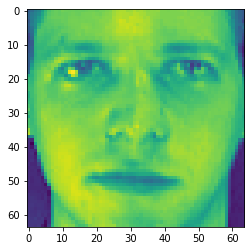

In [190]:
face_image = face.reshape(64,64)
plt.imshow(face_image)


In [210]:
for i in range(3,6):
    print (i)
    print(type(i))

3
<class 'int'>
4
<class 'int'>
5
<class 'int'>


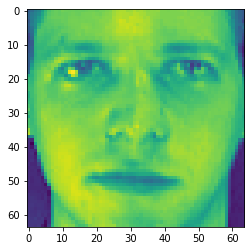

In [234]:
# Let's make a utility function to display a face.

def drawFace(idx=0, X_matrix=olivetti['data']):
    "Draws a face from the Olivetti database. idx is either an array, or an integer. face_matrix is the array containing vectors with 4096 elements"
    if (type(idx) == int):
        face = X_matrix[idx]
        image = face.reshape(64,64)
        plt.imshow(image)
        plt.show()
    else:
        # An iteratble, call ourself with individual elements.
        for i in idx:
            drawFace(i, X_matrix)

drawFace(0)

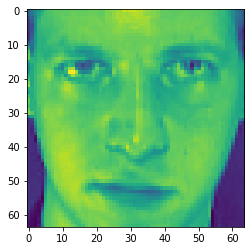

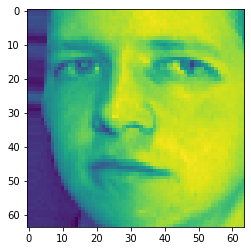

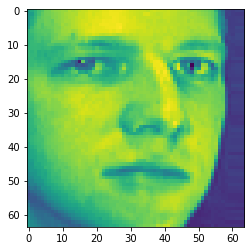

In [237]:
drawFace([i for i in range(2,5)])

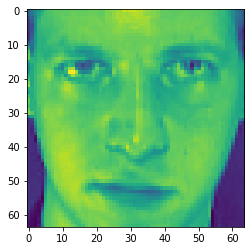

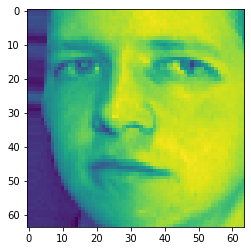

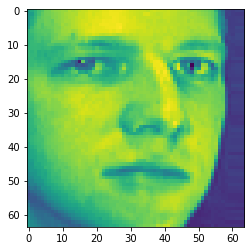

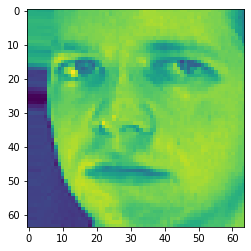

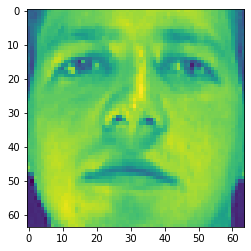

In [238]:
drawFace(range(2,7))

These are all the same person., and we can verify that by looking at the target value, which are person ids: 0..39

Let's look at the remaining data, split it into training and testing, using stratified split.

In [196]:
X = olivetti['data']
X.shape

y = olivetti['target']
y.shape

(400,)

In [194]:
from sklearn.model_selection import StratifiedShuffleSplit

StratifiedShuffleSplit?

Looks like Stratified split will work on the output array, and provide indices, and we need to apply those indicies to the attributes matrix ourselves.

In [314]:
stratified_split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)
stratified_split.get_n_splits()

1

In [317]:
split_generator = stratified_split.split(X, y)

# If n_splits is > 1, then you run a for loop to get all the indices.
# When it is just one, you run next() to call the first, and only split
train_idx, test_idx = next(split_generator)

In [326]:
# Actually split the X (attributes) and y (classes) into training and test set.

# print ("train_idx = ", train_idx)
# print ("test_idx = ", test_idx)

y_train = y[train_idx]
X_train = X[train_idx]
# print ("y_train = ", y_train)

y_test = y[test_idx]
X_test = X[test_idx]
# print ("y_test = ", y_test)



This is the distribution of the input data: equal number of each class: 0, .. , 39

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

(array([100., 100., 100., 100.]),
 array([ 0, 10, 20, 30, 40]),
 <a list of 4 Patch objects>)

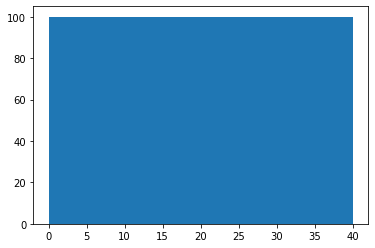

In [327]:
print(y)
a = np.histogram(np.array(y), bins=[0, 10, 20, 30, 40], density=True)

plt.hist(y, bins=[0, 10, 20, 30, 40])

Let's see if Stratified sampling preserved this.

(array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

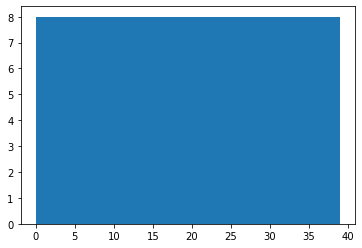

In [321]:
plt.hist(y_test)

Yes, it did. Phew, that was harder than expected, partly because the numpy and matplotlib documentation is so darn bad.

Let's try k-means on it.  Let's see the clusters and see if they have similar faces.

In [329]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(320, 4096)
(320,)
(80, 4096)
(80,)


In [ ]:
# Create clusters
face_kmeans = KMeans(n_clusters=50)
y_pred=face_kmeans.fit_predict(X_train)


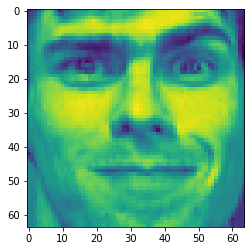

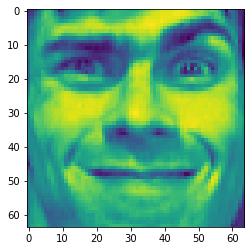

(12, 4096)

In [337]:
# Let's examine the clusters
clusterZ = X_train[y_pred == 0]
clusterZ.shape

drawFace([0, 1], clusterZ)

clusterOne = X_train[y_pred == 1]
clusterOne.shape


But it also clustered these faces together that aren't really the same person

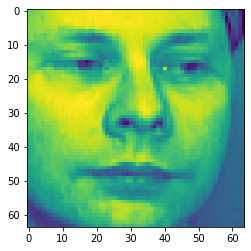

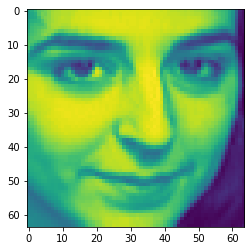

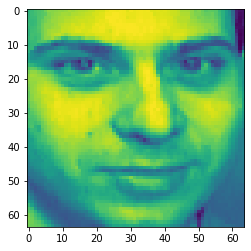

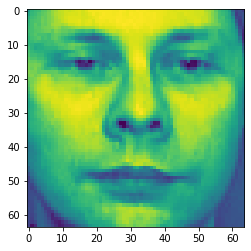

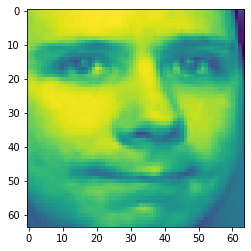

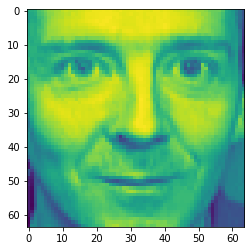

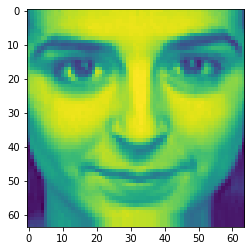

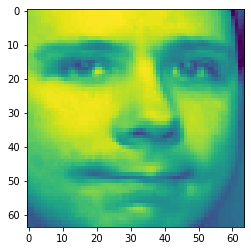

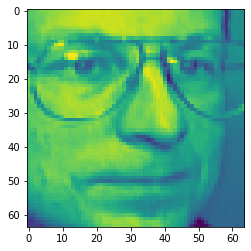

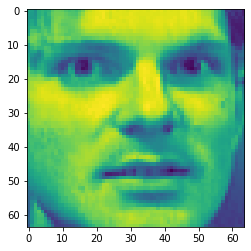

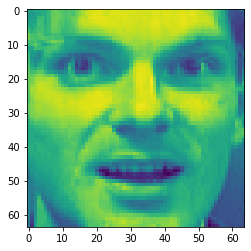

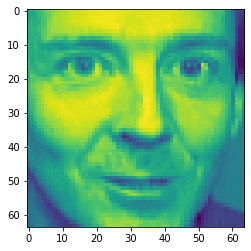

In [338]:
drawFace(range(12), clusterOne)

In [397]:
# Let's create clusters at different sizes

# The range [50, 70) \union [100, 140)
full_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160]
for i in range(50,70): full_range.append(i) 
for i in range(100,160): full_range.append(i) 
print(full_range)


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


In [ ]:
# Let's create clusters at different sizes
face_kmeans = {}
y_pred = {}
scores = {}


In [411]:

# K-Means depends on the starting assignment of centroids, so let's
# run it ten times, picking the best model (by the silhouette score)
# and just store that in the face_kmeans structure.
printout = ""

# Let's create clusters at different sizes
for i in full_range:
    # Initialize to a low value
    scores[str(i)] = -1
    for iteration in range(10):
        predictor = KMeans(n_clusters=i)
        y_predict = predictor.fit_predict(X_train)
        score = silhouette_score(X_train, predictor.labels_)
        printout += "n_clusters = " + str(i)
        printout += ": Score on iteration " + str(iteration) + " is " + str(score)
        printout += "\n"

        # If this is a better model, over-write the previous one.
        if (score > scores[str(i)]):
            face_kmeans[str(i)] = predictor
            y_pred[str(i)] = y_predict
            scores[str(i)] = score


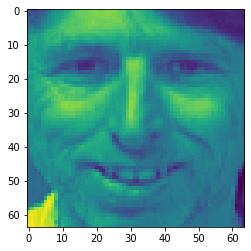

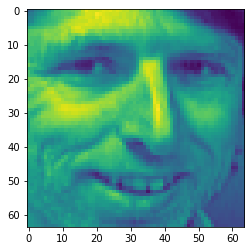

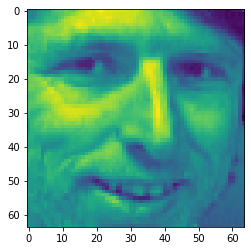

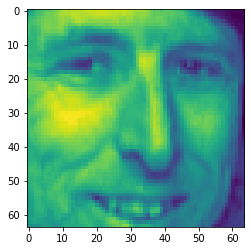

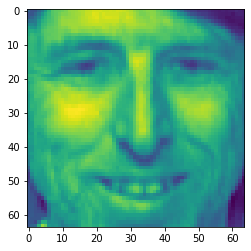

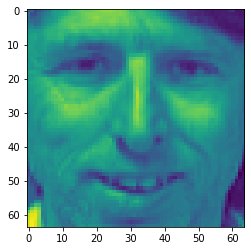

In [402]:
# Let's examine the clusters
clusterZ = X_train[y_pred['120'] == 4]
length = clusterZ.shape[0]

drawFace(range(length), clusterZ)

This looks good, but it is difficult to eyeball all the clusters. Let's use the metrics from earlier to evaluate number of clusters.

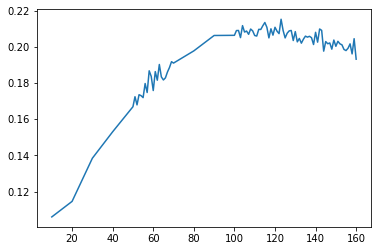

In [415]:
# Let's plot silhouette scores at different sizes
plot_x = [int(i) for i in scores.keys()]
plot_x = np.sort(plot_x)

plot_y = [scores[str(i)] for i in plot_x]

# print(plot_x)
# print(plot_y)
plt.plot(plot_x, plot_y)

After increasing the search in the \[100,160\] range, we see that good cluster values are around 100 or 140. Since I only ran K-Means once the precision of the values is low, because K-Means depends on the starting point.

I won't search for less than 40 clusters, since we know there are 40 faces. More clusters is better.

Based on this, let's just aim at 120 clusters, because that is a good number

In [ ]:

for i in f:
    print("Creating K-means with n_clusters = ", i)
    face_kmeans[str(i)] = KMeans(n_clusters=i)
    y_pred[str(i)] = face_kmeans[str(i)].fit_predict(X_train)
    scores[str(i)] = silhouette_score(X_train, face_kmeans[str(i)].labels_)


Exercise 11: Train a classifier to predict which person.

Then, use k-means as a dimensionality reduction technique and train a classifier on it.

120 looks like a nice round number, let's use the model for 120 clusters, and then reduce the dimension to be nearest cluster + distance

In [416]:
model = face_kmeans['120']


In [ ]:
X_transformed = model.transform(X_train)


Exercise 12: Train a Gaussian Mixture Model on faces.

See if the model can detect anomalies

Exercise 13: Reduce with PCA, preserving 99% of the variance.

Compute reconstruction error for images, including fake images created in ex.12 to see what the errors are, and what they are being reconstructed to.


Conclusions and END OF PART ONE!